Done. You have the matrices PP QQ  RR  SS  WW.
  
Done. You have the matrices "Response" and "Response_named" 
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
  
Here are the UNFILTERED SIMULATED series.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
  
Trend and cycle components have been computed.
The matrices Mat_trend, Mat_trend_named,
Mat_cycle, Mat_cycle_named can be downloaded
to excel or used to make plots.
  
Detrending Filter Used:  Hodrick-Prescott
  
  
Simulated Series, Trend Component, Cyclical Comoponent
x-axis: time periods,  y-axis:  %-deviation from steady state
  


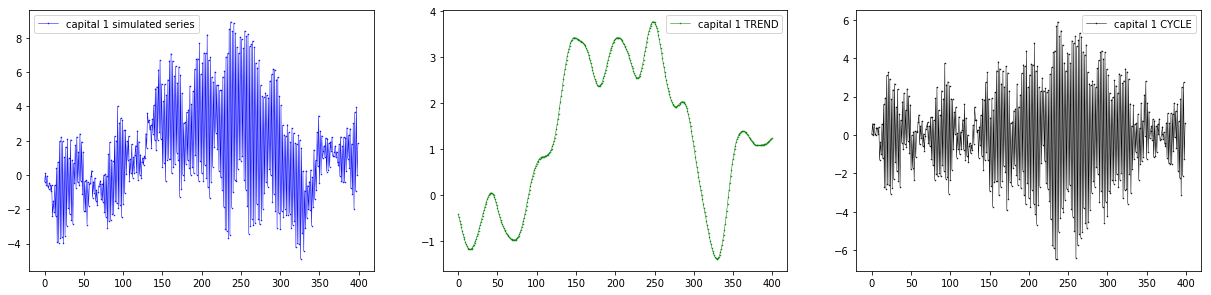

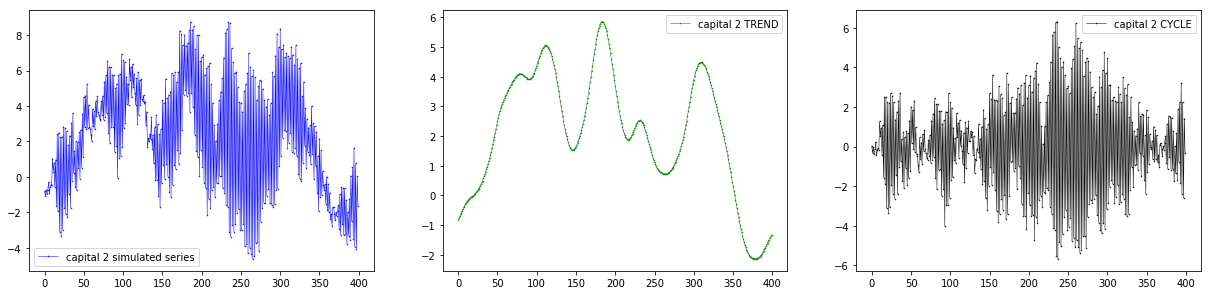

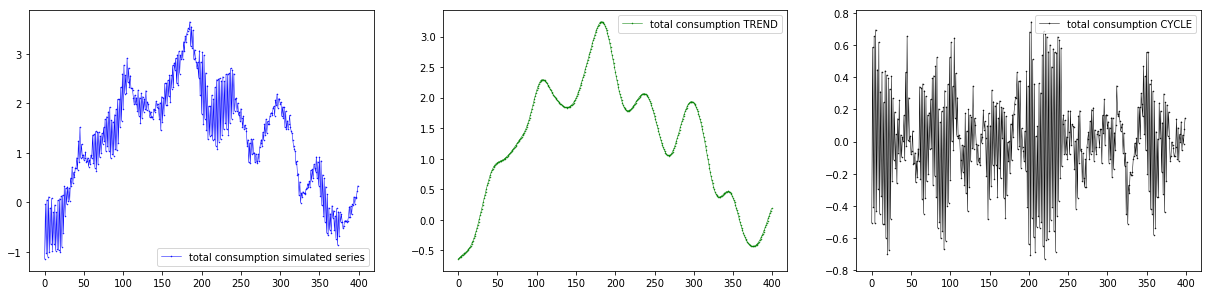

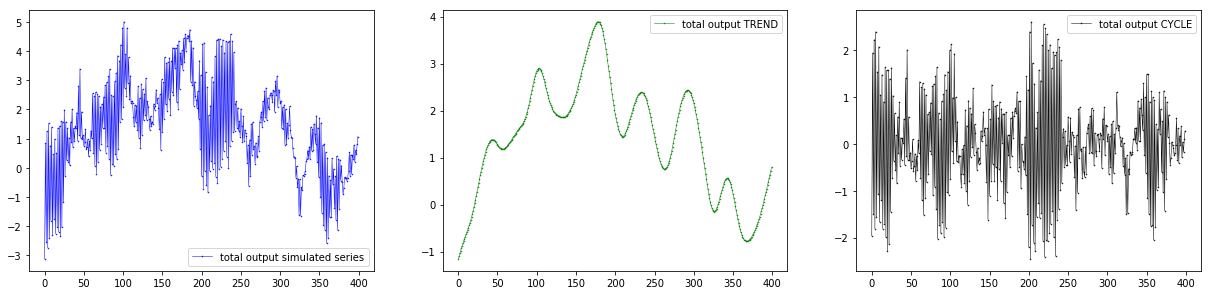

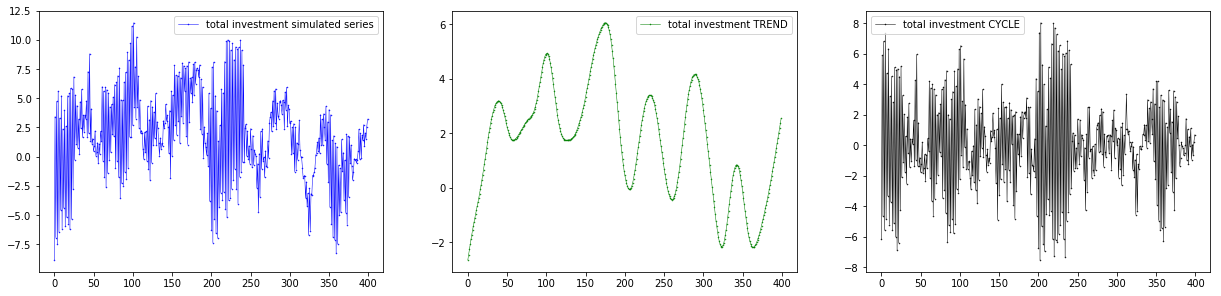

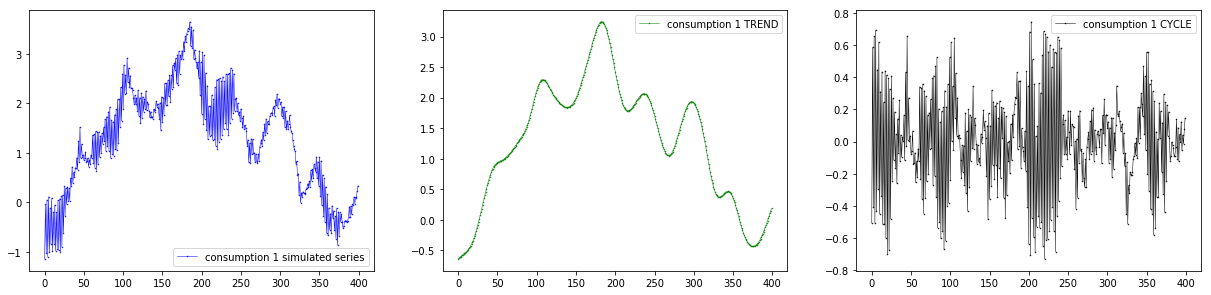

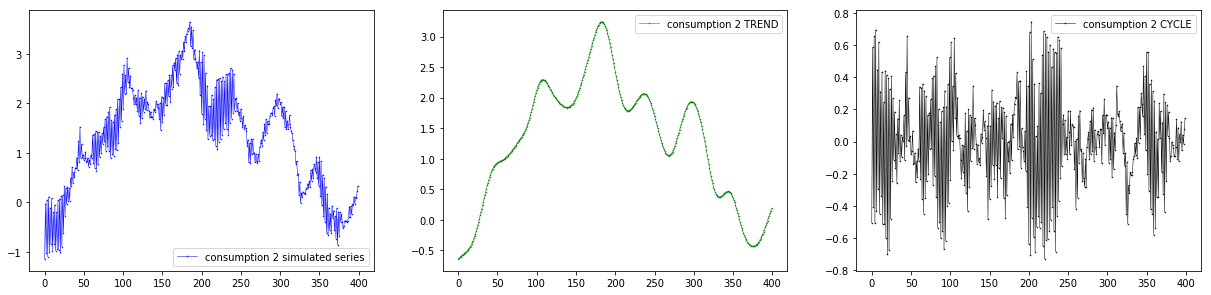

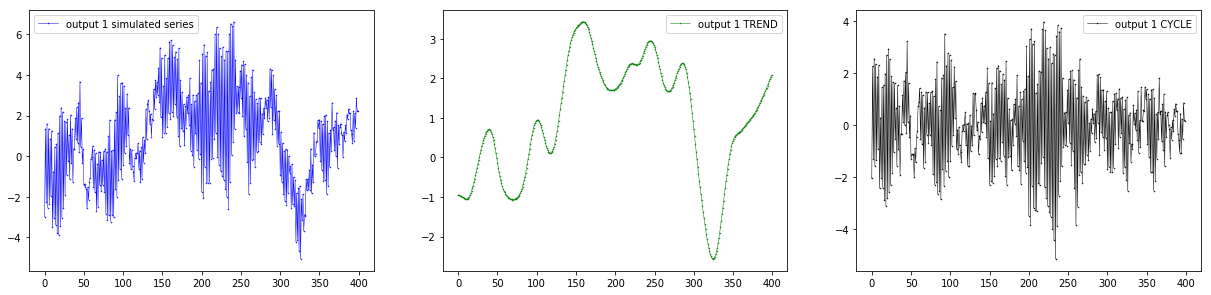

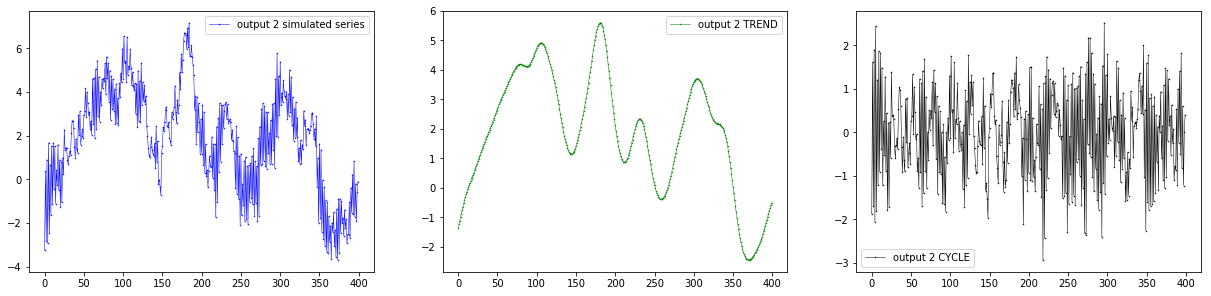

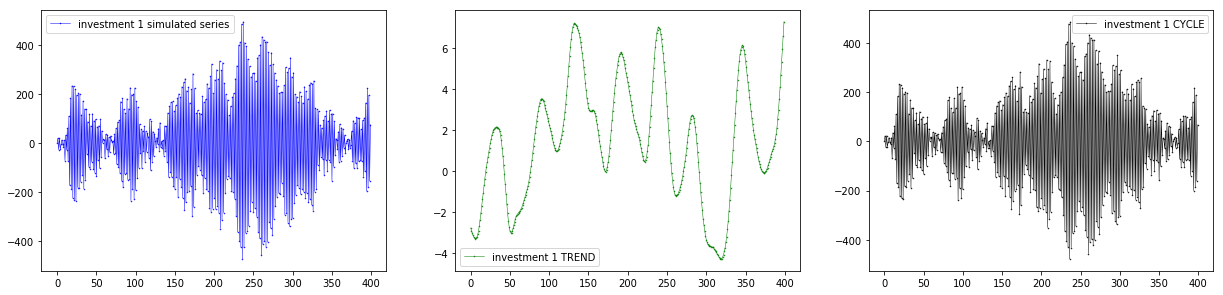

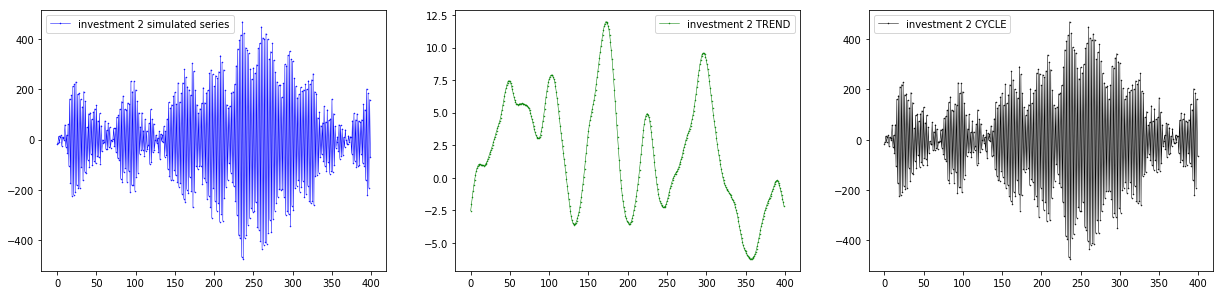

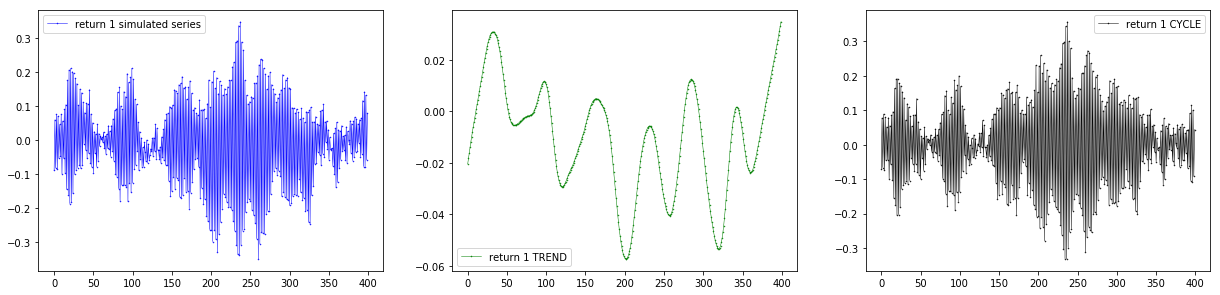

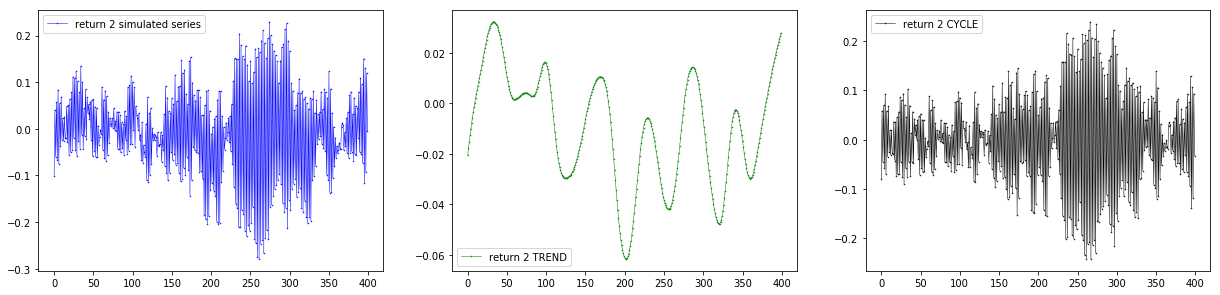

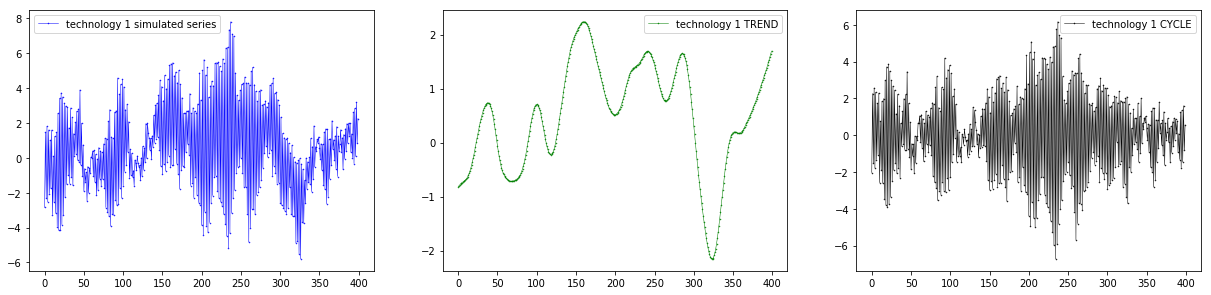

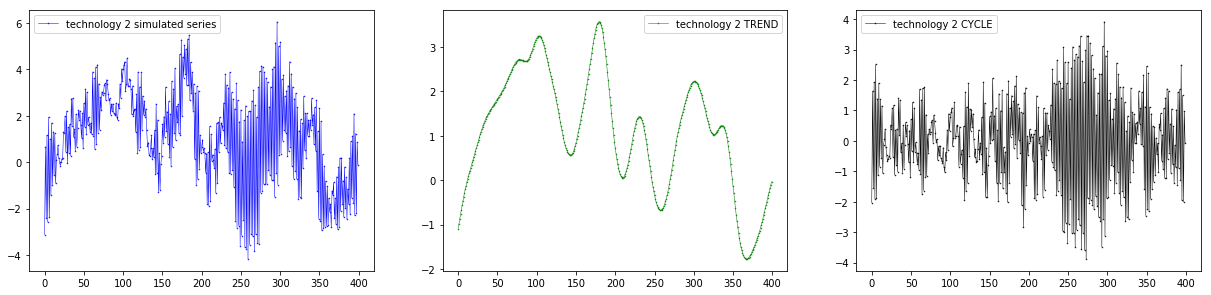

  
  
Shocks used in simulation
  


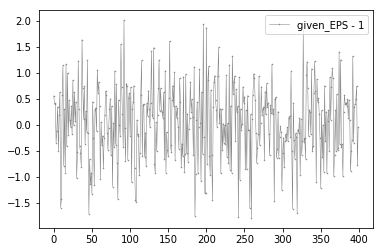

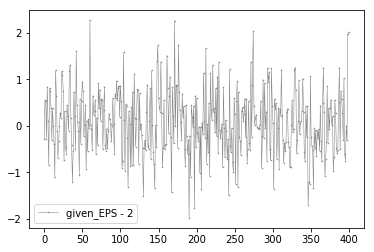

   
   
  
  
  
Here are the moments for the simulated series.
You can also dowload these in tables Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
 


,Mean,Std Deviation,Coeff of Variation
capital 1,-2.89e-14,2.60e+00,-8.97e+13
capital 2,1.09e-13,2.56e+00,2.35e+13
total consumption,2.66e-14,3.07e-01,1.16e+13
total output,4.81e-14,1.04e+00,2.17e+13
total investment,1.41e-14,3.20e+00,2.28e+14
consumption 1,3.44e-14,3.07e-01,8.93e+12
consumption 2,3.20e-14,3.07e-01,9.59e+12
output 1,3.73e-15,1.68e+00,4.50e+14
output 2,8.29e-14,1.04e+00,1.26e+13
investment 1,-3.01e-14,2.02e+02,-6.69e+15


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
 


,Correlation with GDP,Std Dev Relative to GDP
capital 1,5.11e-01,2.49e+00
capital 2,-4.81e-01,2.45e+00
total consumption,9.84e-01,2.94e-01
total output,1.00e+00,1.00e+00
total investment,9.99e-01,3.06e+00
consumption 1,9.84e-01,2.94e-01
consumption 2,9.84e-01,2.94e-01
output 1,8.68e-01,1.61e+00
output 2,6.03e-01,1.00e+00
investment 1,5.10e-01,1.93e+02


 
 
  
Table 03:  Autocorrelations  t + Leads  t=0  t - Lags  (Not Cross Correlations)
 


,capital 1,capital 2,total consumption,total output,total investment,consumption 1,consumption 2,output 1,output 2,investment 1,investment 2,return 1,return 2,technology 1,technology 2
6,8.87e-01,8.85e-01,6.67e-01,6.87e-01,6.88e-01,6.67e-01,6.67e-01,7.55e-01,4.24e-01,9.23e-01,9.21e-01,9.19e-01,8.64e-01,8.78e-01,7.18e-01
5,-9.08e-01,-9.05e-01,-6.44e-01,-7.19e-01,-7.27e-01,-6.44e-01,-6.44e-01,-7.93e-01,-5.02e-01,-9.38e-01,-9.37e-01,-9.34e-01,-8.87e-01,-8.98e-01,-7.58e-01
4,9.22e-01,9.21e-01,7.77e-01,7.85e-01,7.85e-01,7.77e-01,7.77e-01,8.22e-01,5.69e-01,9.52e-01,9.50e-01,9.48e-01,9.11e-01,9.17e-01,8.02e-01
3,-9.25e-01,-9.23e-01,-6.59e-01,-7.53e-01,-7.62e-01,-6.59e-01,-6.59e-01,-7.93e-01,-4.87e-01,-9.65e-01,-9.64e-01,-9.57e-01,-9.25e-01,-9.16e-01,-7.93e-01
2,9.58e-01,9.56e-01,8.87e-01,8.86e-01,8.86e-01,8.87e-01,8.87e-01,8.98e-01,7.54e-01,9.76e-01,9.75e-01,9.74e-01,9.54e-01,9.56e-01,8.92e-01
1,-9.31e-01,-9.30e-01,-6.74e-01,-7.80e-01,-7.90e-01,-6.74e-01,-6.74e-01,-7.70e-01,-4.20e-01,-9.89e-01,-9.89e-01,-9.77e-01,-9.58e-01,-9.26e-01,-8.13e-01
0,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00
-1,-9.31e-01,-9.30e-01,-6.74e-01,-7.80e-01,-7.90e-01,-6.74e-01,-6.74e-01,-7.70e-01,-4.20e-01,-9.89e-01,-9.89e-01,-9.77e-01,-9.58e-01,-9.26e-01,-8.13e-01
-2,9.58e-01,9.56e-01,8.87e-01,8.86e-01,8.86e-01,8.87e-01,8.87e-01,8.98e-01,7.54e-01,9.76e-01,9.75e-01,9.74e-01,9.54e-01,9.56e-01,8.92e-01
-3,-9.25e-01,-9.23e-01,-6.59e-01,-7.53e-01,-7.62e-01,-6.59e-01,-6.59e-01,-7.93e-01,-4.87e-01,-9.65e-01,-9.64e-01,-9.57e-01,-9.25e-01,-9.16e-01,-7.93e-01


 
 
  
Table 04:  Cross Correlations with Output  t + Leads  t=0  t - Lags
 


,capital 1,capital 2,total consumption,total output,total investment,consumption 1,consumption 2,output 1,output 2,investment 1,investment 2,return 1,return 2,technology 1,technology 2
6,4.29e-01,-4.26e-01,6.39e-01,6.87e-01,6.96e-01,6.39e-01,6.39e-01,6.39e-01,3.46e-01,4.38e-01,-4.23e-01,5.51e-01,-2.28e-01,6.05e-01,-6.71e-03
5,-4.54e-01,4.27e-01,-7.23e-01,-7.19e-01,-7.14e-01,-7.23e-01,-7.23e-01,-6.67e-01,-3.66e-01,-4.50e-01,4.34e-01,-5.62e-01,2.40e-01,-6.24e-01,5.88e-03
4,4.52e-01,-4.43e-01,7.40e-01,7.85e-01,7.93e-01,7.40e-01,7.40e-01,7.08e-01,4.31e-01,4.61e-01,-4.43e-01,5.95e-01,-2.17e-01,6.61e-01,3.84e-02
3,-4.75e-01,4.51e-01,-7.46e-01,-7.53e-01,-7.50e-01,-7.46e-01,-7.46e-01,-7.00e-01,-3.80e-01,-4.71e-01,4.55e-01,-5.90e-01,2.50e-01,-6.55e-01,6.72e-03
2,4.80e-01,-4.63e-01,8.52e-01,8.86e-01,8.91e-01,8.52e-01,8.52e-01,7.83e-01,5.12e-01,4.86e-01,-4.65e-01,6.40e-01,-2.10e-01,7.21e-01,7.98e-02
1,-4.92e-01,4.75e-01,-7.55e-01,-7.80e-01,-7.82e-01,-7.55e-01,-7.55e-01,-7.24e-01,-3.94e-01,-4.94e-01,4.77e-01,-6.19e-01,2.62e-01,-6.83e-01,9.01e-03
0,5.11e-01,-4.81e-01,9.84e-01,1.00e+00,9.99e-01,9.84e-01,9.84e-01,8.68e-01,6.03e-01,5.10e-01,-4.86e-01,6.87e-01,-1.98e-01,7.86e-01,1.28e-01
-1,-5.08e-01,5.04e-01,-7.28e-01,-7.80e-01,-7.90e-01,-7.28e-01,-7.28e-01,-7.34e-01,-3.79e-01,-5.18e-01,5.01e-01,-6.43e-01,2.84e-01,-7.01e-01,3.07e-02
-2,5.34e-01,-5.00e-01,8.93e-01,8.86e-01,8.79e-01,8.93e-01,8.93e-01,8.06e-01,4.75e-01,5.30e-01,-5.11e-01,6.72e-01,-2.69e-01,7.50e-01,2.18e-02
-3,-5.22e-01,5.24e-01,-6.90e-01,-7.53e-01,-7.66e-01,-6.90e-01,-6.90e-01,-7.23e-01,-3.43e-01,-5.37e-01,5.21e-01,-6.54e-01,3.13e-01,-7.02e-01,6.72e-02


In [2]:
#  Uhlig's Exampl7.m
#  Two Country Stochastic Neoclassical Growth Model


import numpy as np


Z_bar_1   = 1
Z_bar_2   = 1
rho_1     = 0.36
rho_2     = 0.36
delta_1   = 0.025
delta_2   = 0.025
N_bar_1   = 1/2
N_bar_2   = 1/2
C_1_frac  = 0.5
betta     = 0.99
eta_1     = 1.0
eta_2     = 1.0

psi_1     = 0.95
psi_2     = 0.95

sigma_sigma = 0.712
corr_12   = 0


R_bar_1   = 1.0/betta
R_bar_2   = 1.0/betta

YK_bar_1  = (R_bar_1 - 1 + delta_1)/rho_1
YK_bar_2  = (R_bar_2 - 1 + delta_2)/rho_2

K_bar_1 = N_bar_1 * ( Z_bar_1 / YK_bar_1 )**(1.0/(1-rho_1))
K_bar_2 = N_bar_2 * ( Z_bar_2 / YK_bar_2 )**(1.0/(1-rho_2))

Y_bar_1 = YK_bar_1 * K_bar_1
Y_bar_2 = YK_bar_2 * K_bar_2

X_bar_1 = delta_1 * K_bar_1
X_bar_2 = delta_2 * K_bar_2

Y_bar = Y_bar_1 + Y_bar_2
X_bar = X_bar_1 + X_bar_2

C_bar   = Y_bar - X_bar
C_bar_1 = C_1_frac * C_bar
C_bar_2 = (1-C_1_frac)*C_bar


VARNAMES = ['capital 1',
                         'capital 2',
                         'total consumption',
                         'total output',
                         'total investment',
                         'consumption 1',
                         'consumption 2',
                         'output 1',
                         'output 2',
                         'investment 1',
                         'investment 2',
                         'return 1',
                         'return 2',
                         'technology 1',
                         'technology 2']


AA = np.vstack(([0, 0],  
                          [0, 0],
                          [0, 0],
                          [0, 0],
                          [0, 0], 
                          [0, 0],
                          [0, 0],
                          [-1, 0],
                          [0, -1],
                          [0, 0],
                          [0, 0]))


BB = np.vstack(([0, 0], 
                           [0, 0], 
                           [0, 0],  
                           [0, 0],  
                           [0, 0], 
                           [rho_1, 0], 
                           [0, rho_2],
                           [(1-delta_1),0],
                           [0,(1-delta_2)],
                           [-rho_1*YK_bar_1,0],
                           [0,-rho_2*YK_bar_2 ]))       

CC = np.vstack(([C_bar,-Y_bar, X_bar, 0,  0,    0,  0,    0,  0,  0,  0],
                           [0, 0,-X_bar, 0,  0, 0, 0, X_bar_1,X_bar_2, 0,0],
                           [0,-Y_bar, 0, 0, 0, Y_bar_1,Y_bar_2, 0, 0, 0, 0],
                           [-C_bar,0,0, C_bar_1,C_bar_2,0, 0, 0, 0, 0, 0],
                           [0, 0, 0,  eta_1,-eta_2, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0,  -1, 0, 0, 0, 0, 0],
                           [0,0,0, 0, 0, 0, -1, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0,delta_1,0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0, 0, delta_2, 0, 0],
                           [0, 0, 0, 0, 0, rho_1*YK_bar_1,0, 0, 0, -R_bar_1,0],
                           [0, 0, 0, 0, 0, 0, rho_2*YK_bar_2, 0, 0, 0,-R_bar_2 ]))

DD = np.vstack(([0,0],
                           [0,0],
                           [0,0],
                           [0,0],
                           [0,0],
                           [1,0],
                           [0,1],
                           [0,0],
                           [0,0],
                           [0,0],
                           [0,0]))

FF = np.vstack(([0, 0],
                          [0, 0]))

GG = np.vstack(([0, 0],
                            [0, 0]))

HH = np.vstack(([0, 0],
                           [0, 0]))

JJ = np.vstack(([0, 0, 0, -eta_1, 0, 0, 0, 0, 0, 1, 0],
                          [0, 0, 0, 0, -eta_2, 0, 0, 0, 0, 0, 1]))

KK = np.vstack(([0, 0, 0, eta_1, 0, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, eta_2, 0, 0, 0, 0, 0, 0]))

LL = np.vstack(([0, 0],
                          [0, 0]))

MM = np.vstack(([0, 0],
                            [0, 0]))


NN = np.vstack(([psi_1, 0],
                           [0, psi_2]))

Sigma = [sigma_sigma**2]*np.vstack(([1, corr_12],[corr_12, 1]))

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Detrend_Filters.ipynb

##  USER INPUT:  Remember to set
##  output_index  in the Calc_Moments.ipynb
## This is different for each model

output_index = 3

%run Calc_Moments.ipynb


